In [2]:
!pip install -q keras

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
dataset = pd.read_csv('/content/Churn_Modelling (1).csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'], drop_first = True)

In [6]:
X = pd.concat([X, geography, gender], axis=1)

In [7]:
X = X.drop(['Geography', 'Gender'], axis=1)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [11]:
classifier = Sequential()

In [12]:
classifier.add(Dense(units=6, activation='relu', kernel_initializer='he_uniform', input_dim=11))
classifier.add(Dense(units=6, activation='relu', kernel_initializer='glorot_uniform'))
classifier.add(Dense(units=1, activation='sigmoid'))
classifier.add(Dropout(0.3))
classifier.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model = classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 3s 3ms/step - loss: 2.9119 - accuracy: 0.3781 - val_loss: 0.7755 - val_accuracy: 0.5430
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 2.4557 - accuracy: 0.3853 - val_loss: 0.7474 - val_accuracy: 0.6047
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 2.5112 - accuracy: 0.3695 - val_loss: 0.7392 - val_accuracy: 0.6259
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 2.3481 - accuracy: 0.3866 - val_loss: 0.7334 - val_accuracy: 0.6448
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 2.3376 - accuracy: 0.3814 - val_loss: 0.7287 - val_accuracy: 0.6577
Epoch 6/100
536/536 [==============================] - 1s 3ms/step - loss: 2.2627 - accuracy: 0.3853 - val_loss: 0.7226 - val_accuracy: 0.6713
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 2.2394 - accuracy: 0.3872 - val_loss: 0.7163 - val_accuracy: 0.6842

In [15]:
print(model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


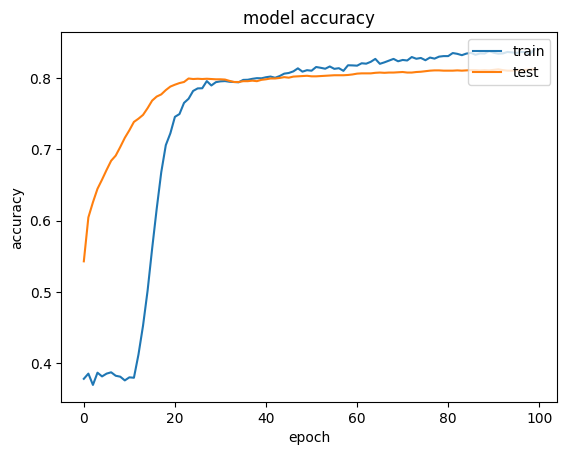

In [16]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

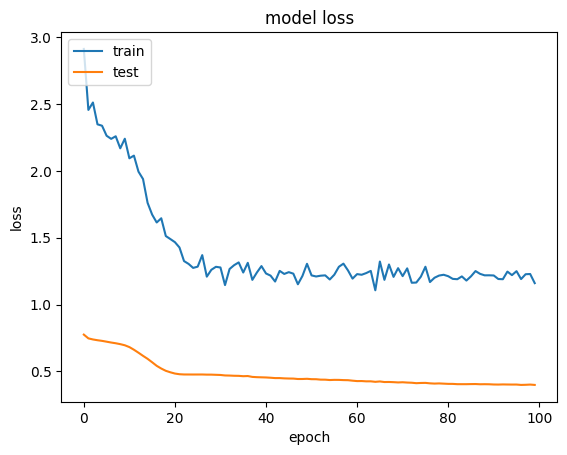

In [18]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
y_pred = classifier.predict(x_test)
y_pred = y_pred > 0.5

63/63 [==============================] - 0s 1ms/step


In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8195